## Web application

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5051
 * Running on http://192.168.1.19:5051
Press CTRL+C to quit
127.0.0.1 - - [17/Jun/2024 16:33:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jun/2024 16:33:58] "GET /alexander-grey-nj9tmN-7YMA-unsplash.jpg HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2024 16:33:58] "GET /favicon.ico HTTP/1.1" 404 -


enter the column you want to visualize it


Data imported


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
DONE PREDICTION
TIME TAKEN TO PREDICT IS : 30.137917518615723


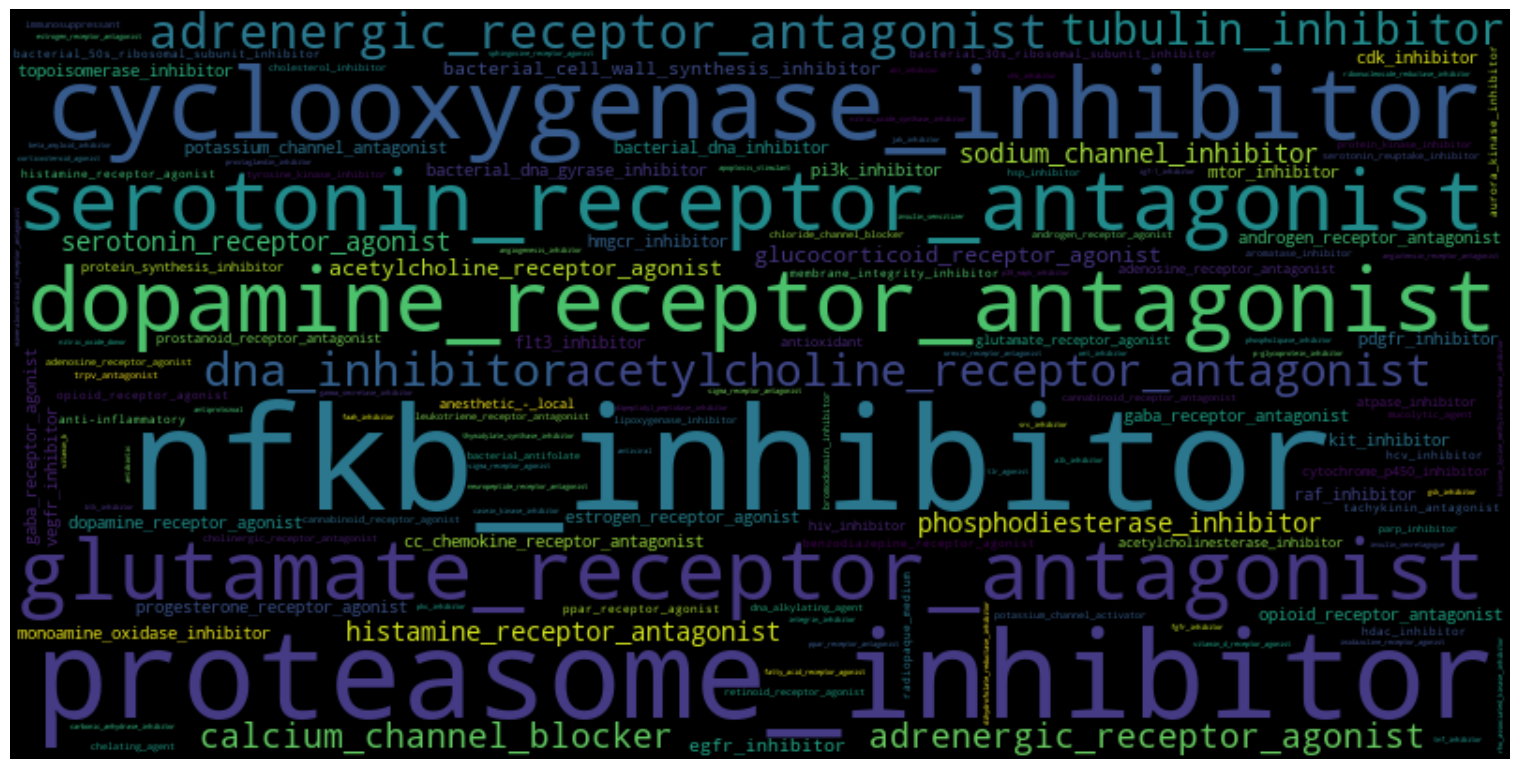

enter the name of sig_id
enter what do you want to show in the bar plot


127.0.0.1 - - [17/Jun/2024 16:34:59] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [17/Jun/2024 16:34:59] "POST /predict HTTP/1.1" 200 -


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick           # For specifying the axes tick format 
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from flask import Flask, request, render_template, make_response
import pickle
from sklearn.preprocessing import LabelEncoder
import time
import os
import tensorflow as tf
from keras.layers import TFSMLayer
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
from wordcloud import WordCloud
import os
import plotly.graph_objects as go
import plotly.subplots as sp


p_min = 0.0005
p_max = 0.9995

# Analyze input data                 --->   in the web make a label that choose the values like cp_type ,.... to show the visualization here i make it as an input value
def analyze_data(data):

    print('enter the column you want to visualize it')
    name_column = input()

    gene_features = []
    cell_features = []
    for i in data.columns:
        if i.startswith('g-'):
            gene_features.append(i)
        if i.startswith('c-'):
            cell_features.append(i)

    if name_column == 'cp_type':
        #Calculate percentages
        colors = ['#1f77b4', '#ff7f0e']
        cp_type_percentages = (data['cp_type'].value_counts()*100.0 /len(data))
        # Create bar chart
        fig = go.Figure(data=[
            go.Bar(name='cp_type', x=cp_type_percentages.index, y=cp_type_percentages.values, 
                marker_color=colors, text=[f'{val:.1f}%' for val in cp_type_percentages.values],
                textposition='auto')
        ])
        # Customize layout
        fig.update_layout(
            title_text='Type of Treatment',
            xaxis_title='cp_type',
            yaxis_title='% Drug',
            barmode='stack'
        )
        fig.show()

    elif name_column == 'cp_time':
        # Define colors
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        # Calculate percentages
        cp_time_percentages = data['cp_time'].value_counts()*100.0 /len(data)
        # Create bar chart
        fig = go.Figure(data=[
            go.Bar(name='cp_time', x=cp_time_percentages.index, y=cp_time_percentages.values, 
                text=[f'{val:.2f}%' for val in cp_time_percentages.values],
                textposition='auto', marker_color=colors)
        ])
        # Customize layout
        fig.update_layout(
            title_text='Time Duration of Treatment',
            xaxis_title='Time',
            yaxis_title='% Treatment',
            barmode='stack'
        )
        fig.show()
        
    elif name_column == 'cp_dose':
        # Define colors
        colors = ['#1f77b4', '#ff7f0e']
        # Calculate percentages
        cp_dose_percentages = data['cp_dose'].value_counts()*100.0 /len(data)
        # Create bar chart
        fig = go.Figure(data=[
            go.Bar(name='cp_dose', x=cp_dose_percentages.index, y=cp_dose_percentages.values, 
                text=[f'{val:.2f}%' for val in cp_dose_percentages.values],
                textposition='auto', marker_color=colors)
        ])
        # Customize layout
        fig.update_layout(
            title_text='Doses of Drugs',
            xaxis_title='Dose',
            yaxis_title='% Treatment',
            barmode='stack'
        )
        fig.show()
            

    elif name_column == 'gene_expression':
        # Create a list to hold the data
        data_list = [data[feature] for feature in gene_features]
        # Create a list of colors
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        # Create a histogram for each gene feature
        fig = go.Figure()
        for i, feature in enumerate(gene_features):
            fig.add_trace(go.Histogram(x=data_list[i], name=feature, marker_color=colors[i % len(colors)]))
        # Update layout for better viewing
        fig.update_layout(
            title_text='Distribution of all Gene Features', # title of plot
            xaxis_title_text='Value', # xaxis label
            yaxis_title_text='Count', # yaxis label
            bargap=0.2, # gap between bars of adjacent location coordinates
            bargroupgap=0.1, # gap between bars of the same location coordinates
            barmode='overlay', # bars are placed on top of each other
        )
        # Update the traces to be normalized for better comparison
        fig.update_traces(opacity=0.75)
        fig.show()

    elif name_column == 'cell_viability':
         # Create a list to hold the data
        data_list = [data[feature] for feature in cell_features]
        # Create a list of colors
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
        # Create a histogram for each gene feature
        fig = go.Figure()
        for i, feature in enumerate(cell_features):
            fig.add_trace(go.Histogram(x = data_list[i], name = feature, marker_color = colors[i % len(colors)]))
        # Update layout for better viewing
        fig.update_layout(
            title_text='Distribution of all Cell Features', # title of plot
            xaxis_title_text='Value', # xaxis label
            yaxis_title_text='Count', # yaxis label
            bargap=0.2, # gap between bars of adjacent location coordinates
            bargroupgap=0.1, # gap between bars of the same location coordinates
            barmode='overlay', # bars are placed on top of each other
        )
        # Update the traces to be normalized for better comparison
        fig.update_traces(opacity=0.75)
        fig.show()


# preprocessing steps
def preprocess(test):

    #ENCODING THE CATEGORICAL DATA
    test['cp_type'] = test['cp_type'].map({'trt_cp': 1, 'ctl_vehicle': 0})
    test['cp_time'] = test['cp_time'].map({48: 1, 72: 2, 24: 0})
    test['cp_dose'] = test['cp_dose'].map({'D1': 0, 'D2': 1})

    gene_features = []
    cell_features = []
    for i in test.columns:
        if i.startswith('g-'):
            gene_features.append(i)
        if i.startswith('c-'):
            cell_features.append(i)

    encoder = load_model("D:\\graduation project\\Graduation Project (MOA)\\autoencoder + neural network\\encoders_gene_features.h5")
    test_gene_features = encoder.predict(test[gene_features])

    encoder = load_model("D:\\graduation project\\Graduation Project (MOA)\\autoencoder + neural network\\encoders_cell_features.h5")
    test_cell_features = encoder.predict(test[cell_features])

    x_1_test = np.hstack((test['cp_type'].values.reshape(-1,1), test['cp_time'].values.reshape(-1, 1), test['cp_dose'].values.reshape(-1, 1),
                        test_gene_features, test_cell_features))

    return x_1_test

# Analyze output data               ----> in the web make a label that name like (show visualization) or make it showed after the prediction done and download prediction or show table of prediction in the web then show visualization below it     
def visualize_output(data):

    x_axis = list(data.columns.values)
    sig_id_values  = x_axis[2:]
    count_of_target = data.iloc[:,2:].sum().values
    dct =dict(zip(sig_id_values, count_of_target)) 
    sorted_dict = dict(sorted(dct.items(), key=lambda i: i[1], reverse=True))

    #BARPLOT WITH THE TOP 20 TARGETS
    # Generate a palette of 20 colors
    colors = sns.color_palette("hsv", 20)
    fig1 = go.Figure(data=[
        go.Bar(y=list(sorted_dict.keys())[:20], x=list(sorted_dict.values())[:20], orientation='h', marker_color = colors.as_hex())
    ])
    fig1.update_layout(
        title='OBSERVING THE TOP 20 TARGET APPEARED IN THE DATASET OR SAMPLE',
        xaxis_title='COUNT OF TARGET',
        yaxis_title='TARGET FEATURES',
        autosize=False,
        width=900,
        height=600,
        yaxis = dict(autorange = 'reversed')
    )
    fig1.show()

    #BARPLOT WITH THE lowest 20 TARGETS
    colors = sns.color_palette("rainbow", 20)
    fig2 = go.Figure(data=[
        go.Bar(y=list(sorted_dict.keys())[-20:], x=list(sorted_dict.values())[-20:], orientation='h', marker_color = colors.as_hex())
    ])
    fig2.update_layout(
        title='OBSERVING THE LOWEST 20 TARGET APPEARED IN THE DATASET OR SAMPLE',
        xaxis_title='COUNT OF TARGET',
        yaxis_title='TARGET FEATURES',
        autosize=False,
        width=900,
        height=600,
        yaxis = dict(autorange = 'reversed')
    )
    fig2.show()

    # Create a dictionary from sorted_dict
    wrd_cloud_dict = dict(sorted_dict.items())
    # Generate the word cloud
    word_cloud = WordCloud(width = 800, height = 400, colormap = 'viridis').generate_from_frequencies(wrd_cloud_dict)
    plt.figure(figsize=(15, 8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

# Analysis of a specific drug     ---> make a label that enter the sig_id of drug and label to choose between (top 20 or lowest 20) i made it as input values
def one_drug(data):
    
    print('enter the name of sig_id')
    name_sig_id = input()

    print('enter what do you want to show in the bar plot')
    type_bar = input()

    data = data[data['sig_id'] == name_sig_id]
    x_axis = list(data.columns.values)
    sig_id_values  = x_axis[2:]
    count_of_target = data.iloc[:,2:].sum().values
    dct =dict(zip(sig_id_values, count_of_target)) 
    sorted_dict = dict(sorted(dct.items(), key=lambda i: i[1], reverse=True))

    if type_bar == 'top 20':
        #BARPLOT WITH THE TOP 20 TARGETS
        fig1 = go.Figure(data=[
            go.Bar(y=list(sorted_dict.keys())[:20], x=list(sorted_dict.values())[:20], orientation='h', marker_color=['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)'])
        ])
        fig1.update_layout(
            title='OBSERVING THE TOP 20 TARGET APPEARED IN THE DATASET OR SAMPLE',
            xaxis_title='COUNT OF TARGET',
            yaxis_title='TARGET FEATURES',
            autosize=False,
            width=900,
            height=600,
            yaxis = dict(autorange = 'reversed')
        )
        fig1.show()

    elif type_bar == 'lowest 20':      
        #BARPLOT WITH THE lowest 20 TARGETS
        fig2 = go.Figure(data=[
            go.Bar(y=list(sorted_dict.keys())[-20:], x=list(sorted_dict.values())[-20:], orientation='h', marker_color=['rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 
                      'rgba(55, 83, 109, 0.8)', 'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)', 
                      'rgba(26, 118, 255, 0.8)', 'rgba(55, 83, 109, 0.8)'])
        ])
        fig2.update_layout(
            title='OBSERVING THE LOWEST 20 TARGET APPEARED IN THE DATASET OR SAMPLE',
            xaxis_title='COUNT OF TARGET',
            yaxis_title='TARGET FEATURES',
            autosize=False,
            width=900,
            height=600,
            yaxis = dict(autorange = 'reversed')
        )
        fig2.show()
    
    else:
        pass

# app
app = Flask(__name__)

@app.route('/')
def form():
    return """
        <!doctype html>
        <html>

        <head>
        <title>PREDICTION OF MECHANISM OF ACTION</title>
        <style>
            body {
                background-image: url('alexander-grey-nj9tmN-7YMA-unsplash.jpg');
                /* Set background image */
                background-size: cover;
                /* Cover the entire viewport */
                background-repeat: no-repeat;
                /* background-color: #aea6a6; */
                /* Set background color */
                font-family: Arial, sans-serif;
                /* Set font family */
                text-align: center;
                /* Center align text */
            }

            h1 {
                color: #920055;
                /* Set heading color */
            }

            form {
                margin-top: 50px;
                /* Add some space from the top */
            }

            input[type="file"] {
                padding: 30px;
                /* Add padding for better appearance */
                border: 1px solid #f6f6f6;
                /* Add border */
                border-radius: 20px;
                /* Add border radius */
            }

            input[type="submit"] {
                padding: 15px 40px;
                /* Add padding */
                background-color: #000000;
                /* Set button background color */
                color: rgb(7, 229, 96);
                /* Set button text color */
                border: none;
                /* Remove border */
                border-radius: 10px;
                /* Add border radius */
                cursor: pointer;
                /* Add cursor pointer on hover */
            }

            input[type="submit"]:hover {
                background-color: #167127;
                /* Change background color on hover */
            }

            #prediction {
                margin-top: 30px;
                /* Add space from the submit button */
                color: #800f0f;
                /* Set prediction text color */
            }
        </style>
        </head>

        <body>
        <h1>PREDICTION OF MECHANISM OF ACTION</h1>
        <form method="POST" action="/predict" enctype="multipart/form-data">
            <p><input type="file" name="file"></p>
            <p><input type="submit" value="Predict"></p>
        </form>
        <div id="prediction"></div>
        </body>

        </html>
    """

@app.route('/index')
def index():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():

    file = request.files['file']

    if not file:
        return "No file"

    # take the data
    data  = pd.read_csv(file , delimiter=',')
    analyze_data(data)
    print('Data imported')

    start_time = time.time()

    # apply preprocessing
    new_data = preprocess(data)


    # read the models files
    directory = "D:\\graduation project\\Graduation Project (MOA)\\autoencoder + neural network\\models"  # replace with your directory path
    file_paths = []

    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        file_paths.append(file_path)

    # predict the raw data
    y_pred = np.zeros((new_data.shape[0], 206))
    for i in file_paths:

        model = load_model(i)
        y_pred += model.predict(new_data) / (21)

    print('DONE PREDICTION')
    end_time = time.time()
    print('TIME TAKEN TO PREDICT IS : {}'.format(end_time - start_time))


    prediction_sub = pd.DataFrame()
    sub = pd.read_csv("D:\graduation project\dataset\sample_submission.csv")
    sub.iloc[ : new_data.shape[0],1:] = np.clip(y_pred,p_min,p_max)
    prediction_sub = sub.iloc[ : new_data.shape[0], : ]
    prediction_sub['sig_id'] = data['sig_id']

    # download the prediction csv file
    response = make_response(prediction_sub.to_csv(index=False))
    response.headers["Content-Disposition"] = "attachment; filename=prediction.csv"

    # visualize the output
    visualize_output(prediction_sub)
    one_drug(prediction_sub)
    
    return response


if __name__ == "__main__":
    app.run(host='0.0.0.0',port=5051)
